In [1849]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import missingno as msno
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1850]:

df['view'].value_counts(dropna=False)


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

In [1851]:
df['view'].replace({ 'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 5}, inplace=True)

In [1852]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,0.00,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,0.00,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,0.00,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,0.00,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,0.00,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,0.00,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,0.00,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,0.00,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,0.00,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [1853]:
ll_df = df[['lat', 'long']]
df = df.drop(columns=['sqft_living15', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'grade', 'sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'id', 'date', 'floors', 'waterfront', 'long', 'lat', 'yr_renovated']).set_index(df['id'])

In [1854]:
df['condition'].replace({ 'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)

In [1855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21597 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21597 non-null  int64  
 3   yr_built   21597 non-null  int64  
 4   zipcode    21597 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1012.4 KB


In [1856]:
df.describe()

,price,view,condition,yr_built,zipcode
count,21597.00,21534.00,21597.00,21597.00,21597.00
mean,540296.57,0.25,2.41,1971.00,98077.95
std,367368.14,0.84,0.65,29.38,53.51
min,78000.00,0.00,0.00,1900.00,98001.00
25%,322000.00,0.00,2.00,1951.00,98033.00
50%,450000.00,0.00,2.00,1975.00,98065.00
75%,645000.00,0.00,3.00,1997.00,98118.00
max,7700000.00,5.00,4.00,2015.00,98199.00


In [1857]:
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21534 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21534 non-null  int64  
 3   yr_built   21534 non-null  int64  
 4   zipcode    21534 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1009.4 KB


In [1858]:
df['view'].dropna(how='any',inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21534 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21534 non-null  int64  
 3   yr_built   21534 non-null  int64  
 4   zipcode    21534 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1009.4 KB


In [1859]:
# getting rid of outliners before copy is made
Q1 = df['price'].quantile(0.01)
Q3 = df['price'].quantile(0.98)
IQR = Q3 - Q1

df = df[df['price'] > Q1]
df = df[df['price'] < Q3]

df.describe()

,price,view,condition,yr_built,zipcode
count,20870.00,20870.00,20870.00,20870.00,20870.00
mean,508548.26,0.21,2.41,1971.13,98078.17
std,253142.22,0.76,0.65,29.30,53.21
min,154200.00,0.00,0.00,1900.00,98001.00
25%,324500.00,0.00,2.00,1952.00,98033.00
50%,449999.50,0.00,2.00,1975.00,98065.00
75%,629912.50,0.00,3.00,1997.00,98118.00
max,1590000.00,5.00,4.00,2015.00,98199.00


In [1860]:
# make duplicate 
dum_df = df.copy()

In [1861]:
enc = OrdinalEncoder()

df[['enc_view', 'enc_condition']] = enc.fit_transform(df[['view', 'condition']])





In [1862]:
#df = df[df["view"].str.contains("NONE")==False]
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00
mean,508548.26,0.21,2.41,1971.13,98078.17,0.20,2.41
std,253142.22,0.76,0.65,29.30,53.21,0.70,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,324500.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,449999.50,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,629912.50,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1590000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [1863]:
df['enc_view'].value_counts()

0.00    19013
2.00      902
3.00      443
1.00      304
4.00      208
Name: enc_view, dtype: int64

In [1864]:
df['view'].value_counts(dropna=False)
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00
mean,508548.26,0.21,2.41,1971.13,98078.17,0.20,2.41
std,253142.22,0.76,0.65,29.30,53.21,0.70,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,324500.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,449999.50,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,629912.50,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1590000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [1865]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00
mean,508548.26,0.21,2.41,1971.13,98078.17,0.20,2.41
std,253142.22,0.76,0.65,29.30,53.21,0.70,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,324500.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,449999.50,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,629912.50,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1590000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [1866]:
#df = df[df["yr_renovated"]!=0]
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00
mean,508548.26,0.21,2.41,1971.13,98078.17,0.20,2.41
std,253142.22,0.76,0.65,29.30,53.21,0.70,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,324500.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,449999.50,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,629912.50,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1590000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [1867]:

# turn ['view'] column into binary coilumns for each category





In [1868]:
df.describe()

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00,20870.00
mean,508548.26,0.21,2.41,1971.13,98078.17,0.20,2.41
std,253142.22,0.76,0.65,29.30,53.21,0.70,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,324500.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,449999.50,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,629912.50,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1590000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [1869]:
df_matrix = df.corr()
df_matrix['price']

price            1.00
view             0.31
condition        0.03
yr_built         0.05
zipcode         -0.03
enc_view         0.31
enc_condition    0.03
Name: price, dtype: float64

In [1870]:
df['view'].value_counts()

0.00    19013
2.00      902
3.00      443
1.00      304
5.00      208
Name: view, dtype: int64

In [1871]:
#Q1 = df['price'].quantile(0.003)
Q3 = df['price'].quantile(0.99)
IQR = Q3 - Q1

#df = df[df['price'] > Q1]
df = df[df['price'] < Q3]

df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20659.00,20659.00,20659.00,20659.00,20659.00,20659.00,20659.00
mean,498671.39,0.20,2.41,1971.10,98078.30,0.20,2.41
std,234618.88,0.74,0.65,29.27,53.18,0.69,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,322000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,445830.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,622350.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1380000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


(array([3256., 5132., 4399., 3139., 2011., 1238.,  715.,  295.,  268.,
         206.]),
 array([ 154200.,  276780.,  399360.,  521940.,  644520.,  767100.,
         889680., 1012260., 1134840., 1257420., 1380000.]),
 <BarContainer object of 10 artists>)

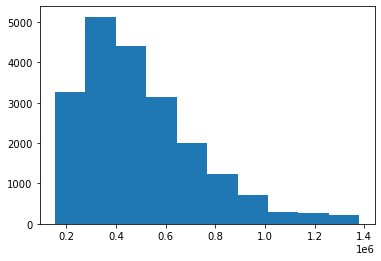

In [1872]:
plt.hist(df['price'])

In [1873]:
df_matrix = df.corr()
df_matrix['price']

price            1.00
view             0.29
condition        0.03
yr_built         0.05
zipcode         -0.02
enc_view         0.29
enc_condition    0.03
Name: price, dtype: float64

In [1874]:
X = df.drop(columns=['price'])
y = df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

model = sm.OLS(y_train, sm.add_constant(X_train['view'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1332.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          6.41e-280
Time:                        07:19:42   Log-Likelihood:            -2.1292e+05
No. Observations:               15494   AIC:                         4.258e+05
Df Residuals:                   15492   BIC:                         4.259e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.804e+05   1872.440    256.587      0.000    4.77e+05    4.84e+05
view        8.946e+04   2450.944     36.502      0.000    8.47e+04    9.43e+04
==============================================================================
Omnibus:                     2276.926   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3548.832
Skew:                           1.037   Prob(JB):                         0.00
Kurtosis:                       4.095   Cond. No.                         1.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1875]:
train_preds = model.predict(sm.add_constant(X_train['view']))
test_preds = model.predict(sm.add_constant(X_test['view']))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.0792
Test R2: 0.0964
****
Train RMSE: $224,820.46
Test RMSE: $223,942.11
****
Train MAE: $176,625.13
Test MAE: $175,253.35


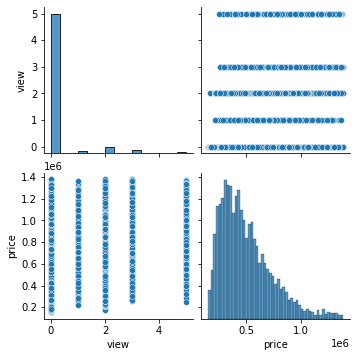

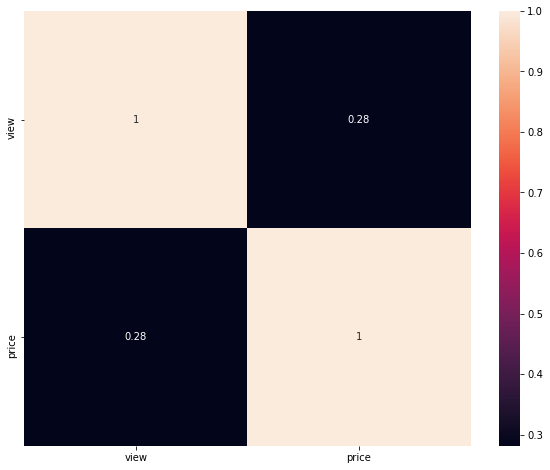

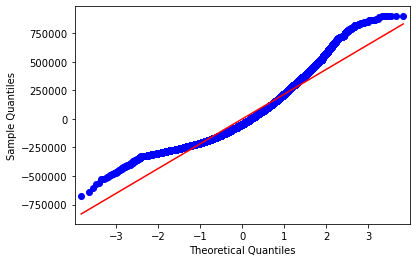

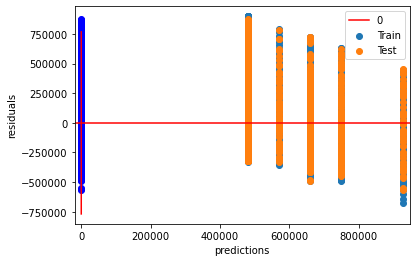

In [1876]:

# Let's also check the assumptions of linearity.
functions.check_assumptions(X_train['view'], y_train, train_preds, test_preds, y_test)

In [1877]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20659.00,20659.00,20659.00,20659.00,20659.00,20659.00,20659.00
mean,498671.39,0.20,2.41,1971.10,98078.30,0.20,2.41
std,234618.88,0.74,0.65,29.27,53.18,0.69,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,322000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,445830.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,622350.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1380000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [1878]:
df.shape

(20659, 7)

In [1879]:
dum_df = pd.get_dummies(data=dum_df, columns=['view'], drop_first=True)
dum_df.head()

,price,condition,yr_built,zipcode,view_1.0,view_2.0,view_3.0,view_5.0
id,,,,,,,,
7129300520,221900.00,2,1955,98178,0,0,0,0
6414100192,538000.00,2,1951,98125,0,0,0,0
5631500400,180000.00,2,1933,98028,0,0,0,0
2487200875,604000.00,4,1965,98136,0,0,0,0
1954400510,510000.00,2,1987,98074,0,0,0,0


In [1880]:
dum_df = pd.get_dummies(data=dum_df, columns=['condition'], drop_first=True)

In [1881]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20870 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20870 non-null  float64
 1   yr_built     20870 non-null  int64  
 2   zipcode      20870 non-null  int64  
 3   view_1.0     20870 non-null  uint8  
 4   view_2.0     20870 non-null  uint8  
 5   view_3.0     20870 non-null  uint8  
 6   view_5.0     20870 non-null  uint8  
 7   condition_1  20870 non-null  uint8  
 8   condition_2  20870 non-null  uint8  
 9   condition_3  20870 non-null  uint8  
 10  condition_4  20870 non-null  uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 815.2 KB


In [1882]:
dum_df = pd.get_dummies(data=dum_df, columns=['zipcode'], drop_first=True)

In [1883]:
dum_df_matrix = dum_df.corr()
dum_df_matrix['price']

price            1.00
yr_built         0.05
view_1.0         0.09
view_2.0         0.16
view_3.0         0.17
                 ... 
zipcode_98177    0.04
zipcode_98178   -0.09
zipcode_98188   -0.07
zipcode_98198   -0.09
zipcode_98199    0.11
Name: price, Length: 79, dtype: float64

In [1884]:
dum_df['price'].describe()

count     20870.00
mean     508548.26
std      253142.22
min      154200.00
25%      324500.00
50%      449999.50
75%      629912.50
max     1590000.00
Name: price, dtype: float64

In [1885]:
d_X = dum_df.drop(columns=['price'])
d_y = dum_df['price']

# Train / Test split\


dum_X_train, dum_X_test, dum_y_train, dum_y_test = train_test_split(
    d_X, d_y, test_size=0.25, random_state=42)

#model= sm.OLS(dum_y_train, sm.add_constant(dum_X_train['view_5.0'])).fit()
#model.summary()

LR = LinearRegression()
LR.fit(dum_X_train, dum_y_train)

dum_y_prediction = LR.predict(dum_X_test)
dum_y_prediction



array([658869.85125968, 466406.0726287 , 291417.5289594 , ...,
       551693.19423662, 517706.15482454, 301010.31870138])

In [1886]:
score=r2_score(dum_y_test,dum_y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(dum_y_test,dum_y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(dum_y_test,dum_y_prediction)))

r2 score is  0.546236194373666
mean_sqrd_error is== 29002302911.375126
root_mean_squared error of is== 170300.62510564993


In [1887]:
# For comparing the models, let's also use our evaluate() function to get R2, RMSE, MAE
#dum_train_preds = model.predict(sm.add_constant(dum_X_train['view_5.0']))
#dum_test_preds = model.predict(sm.add_constant(dum_X_test['view_5.0']))
#functions.evaluate(dum_y_train, train_preds, dum_y_test, test_preds)

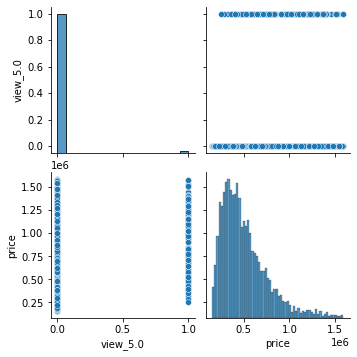

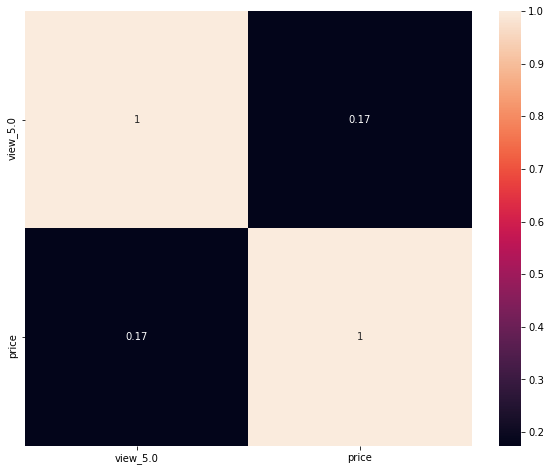

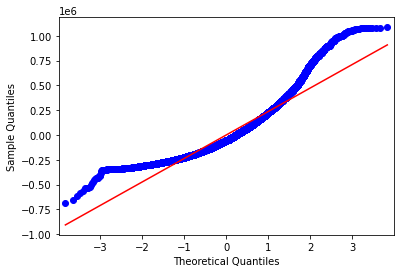

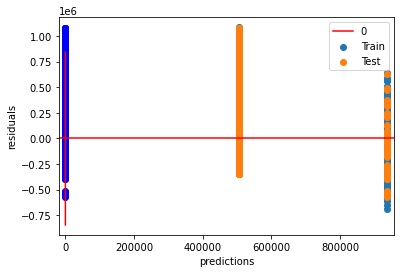

In [1888]:
functions.check_assumptions(dum_X_train['view_5.0'], dum_y_train, dum_train_preds, dum_test_preds, dum_y_test)

In [1889]:
dum_df.shape

(20870, 79)

In [1890]:
dum_df.columns

Index(['price', 'yr_built', 'view_1.0', 'view_2.0', 'view_3.0', 'view_5.0',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode

In [1891]:

df.columns

Index(['price', 'view', 'condition', 'yr_built', 'zipcode', 'enc_view',
       'enc_condition'],
      dtype='object')

In [1892]:
formula = 'price ~ view+condition+yr_built+zipcode+enc_view'
model = ols(formula=formula, data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     417.3
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        07:19:45   Log-Likelihood:            -2.8378e+05
No. Observations:               20659   AIC:                         5.676e+05
Df Residuals:                   20653   BIC:                         5.676e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.429e+06   3.15e+06      2.677      0.007    2.26e+06    1.46e+07
view        1.194e+04   1.92e+04      0.623      0.534   -2.57e+04    4.95e+04
condition   1.798e+04   2611.042      6.884      0.000    1.29e+04    2.31e+04
yr_built     633.6453     61.460     10.310      0.000     513.180     754.111
zipcode      -94.2339     31.615     -2.981      0.003    -156.202     -32.266
enc_view    8.829e+04   2.08e+04      4.255      0.000    4.76e+04    1.29e+05
==============================================================================
Omnibus:                     2993.965   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4644.095
Skew:                           1.028   Prob(JB):                         0.00
Kurtosis:                       4.082   Cond. No.                     1.98e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1893]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,20659.00,20659.00,20659.00,20659.00,20659.00,20659.00,20659.00
mean,498671.39,0.20,2.41,1971.10,98078.30,0.20,2.41
std,234618.88,0.74,0.65,29.27,53.18,0.69,0.65
min,154200.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,322000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,445830.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,622350.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1380000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [1902]:
sdf = df.groupby('price')['zipcode'].sum()

In [1936]:
sdf = sdf.reset_index()

In [1937]:
sdf.columns

Index(['price', 'zipcode'], dtype='object')

In [1938]:
sX = sdf['zipcode']
sy = sdf['price']

sX_train, sX_test, sy_train, sy_test = train_test_split(
    sX, sy, test_size=0.33)

smodel = sm.OLS(sy_train, sm.add_constant(sX_train)).fit()
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1762
Date:                Thu, 07 Oct 2021   Prob (F-statistic):              0.675
Time:                        07:33:58   Log-Likelihood:                -30963.
No. Observations:                2250   AIC:                         6.193e+04
Df Residuals:                    2248   BIC:                         6.194e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.134e+05   5188.027     98.958      0.000    5.03e+05    5.24e+05
zipcode       -0.0013      0.003     -0.420      0.675      -0.008       0.005
==============================================================================
Omnibus:                      129.529   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.323
Skew:                           0.626   Prob(JB):                     2.28e-33
Kurtosis:                       2.815   Cond. No.                     1.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""